In [64]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [3]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [4]:
pd.options.plotting.backend = "plotly"
svg_option = "svg"

In [5]:
## read data from news_ratings_df.csv
# news_ratings_data = pd.read_csv('news_ratings_df_filtered.csv', index_col=None)

In [6]:
# %store news_ratings_data
%store -r news_ratings_data

In [7]:
news_ratings_data.head()

,id,date,updated,title,caption,expandedLinks,link,postUrl,subscriberCount,score,account_id,account_name,account_handle,account_subscriberCount,account_url,account_accountType,account_pageAdminTopCountry,account_verified,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,domain,rating,credible
0,111622404459,2020-11-22 23:59:49,2020-11-25 18:13:36,L.A. County suspends outdoor dining at restaurants as coronavirus surges,latimes.com,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.latimes.com/california/story/2020-11-22/l-a-county-suspends-outdoor-dining-at-restaurants-as-coronavirus-surges,https://www.facebook.com/edgarreece/posts/3504433216313464,2351,3.739130,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,latimes.com,100.0,True
1,111678477449,2020-11-23 23:59:58,2020-11-25 18:17:53,Trump Administration To Begin Biden Transition Protocols,npr.org,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.npr.org/2020/11/23/937956178/trump-administration-to-begin-biden-transition-protocols?utm_source=facebook.com&utm_term=nprnews&utm_campaign=npr&utm_medium=social,https://www.facebook.com/OccupySpokane/posts/3477341109030911,21775,2.333333,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,npr.org,100.0,True
2,111737873253,2020-11-24 23:59:23,2020-11-25 16:15:55,"Russia, eyeing foreign markets, says Sputnik COVID-19 vaccine to cost under $20",reuters.com,https://reut.rs/39bWCNG,https://reut.rs/39bWCNG,https://www.facebook.com/groups/335017933691230/permalink/962329240960093,18498,-21.000000,4619429,Council Member Ed Reece,edgarreece,2354,https://www.facebook.com/165175133572639,facebook_page,US,True,9,32,23,0,2,1,9,10,0,0,reut.rs,100.0,True
3,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://www.businessinsider.com/china-emotional-surveillance-technology-2018-4,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,businessinsider.com,100.0,True
4,111622415061,2020-11-22 23:59:48,2020-11-25 18:11:01,This is a re-share of a post,NaN,https://www.wsj.com/articles/chinas-efforts-to-lead-the-way-in-ai-start-in-its-classrooms-11571958181,https://www.facebook.com/100576118560804/posts/100621611889588/,https://www.facebook.com/groups/378361242549568/permalink/1253075498411467,388,-0.750000,12571754,Australia & New Zealand Geoengineering Watch,NaN,388,https://www.facebook.com/groups/378361242549568,facebook_group,NaN,False,103,11,3,15,0,1,0,0,0,0,wsj.com,100.0,True


#### percentage of credible and non-credible domains in unique domains

In [8]:
newsguard_domains_count = news_ratings_data[['domain', 'credible']].groupby('credible').domain.nunique().reset_index().sort_values('credible', ascending=False)

In [9]:
newsguard_domains_count

,credible,domain
1,True,999
0,False,34


In [10]:
total_domains_count = newsguard_domains_count.domain[0]+newsguard_domains_count.domain[1]
newsguard_domains_count['percentage'] = newsguard_domains_count.domain.apply(lambda x: x*100.0/total_domains_count)
newsguard_domains_count

,credible,domain,percentage
1,True,999,96.708616
0,False,34,3.291384


## General Characterization

In [11]:
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible'],
      dtype='object')

In [12]:
len(news_ratings_data)

340931

In [13]:
### number of posts
posts = news_ratings_data['id']
unique_posts = len(posts.unique())
print('#Unique Posts: ', unique_posts)

#Unique Posts:  331839


In [14]:
### number of unique URLs
urls = news_ratings_data['expandedLinks']
print('#Total URLs: ', len(urls))
print('#Unique URLs: ', len(urls.unique()))

#Total URLs:  340931
#Unique URLs:  182377


In [15]:
### number of users
users = news_ratings_data['account_id']
print('#Users: ', len(users.unique()))

#Users:  40077


In [16]:
### number of credible and non-credible articles
credibility_summary = news_ratings_data[['id', 'credible']].groupby('credible').count().sort_values('id', ascending=False).reset_index()

In [17]:
credibility_summary

,credible,id
0,True,320763
1,False,20168


#### % of Credible and Non-Credible Users

In [18]:
total_credible_count = credibility_summary.id[0]+credibility_summary.id[1]
credibility_summary['percentage'] = credibility_summary.id.apply(lambda x: x*100.0/total_credible_count)
credibility_summary

,credible,id,percentage
0,True,320763,94.084434
1,False,20168,5.915566


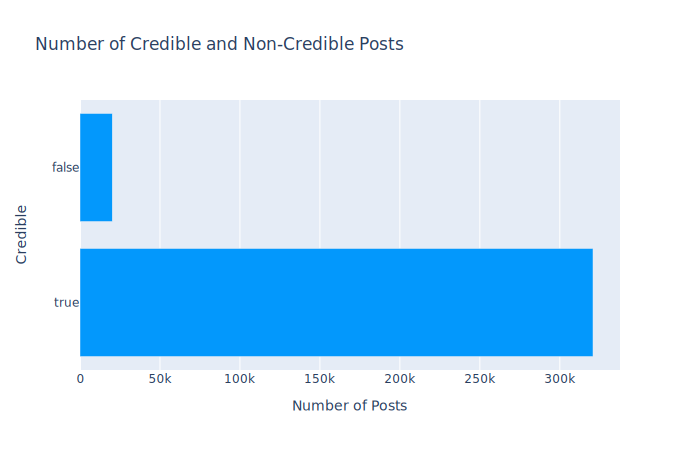

In [19]:
fig = go.Figure(data=go.Bar(x=credibility_summary.id, y=credibility_summary.credible, orientation='h', marker={'color':'#0398fc'}))
fig.update_layout(
    title="Number of Credible and Non-Credible Posts",
    yaxis_title="Credible",
    xaxis_title="Number of Posts")
fig.show(svg_option)

In [20]:
fig.write_image("images/credible_noncredible_count.png")

In [21]:
news_ratings_data['date'] = pd.to_datetime(news_ratings_data.date)

In [27]:
news_ratings_data['day'] = news_ratings_data.date.dt.floor('d')

In [22]:
# news_ratings_data['hour'] = news_ratings_data.date.dt.floor('h')

In [28]:
cred_df = pd.pivot_table(news_ratings_data, values = 'id', index = 'day',
               columns = 'credible',aggfunc ='count').reset_index()

In [29]:
cred_df.head()

credible,day,False,True
0,2020-11-22,5912,85259
1,2020-11-23,6700,113137
2,2020-11-24,7556,122367


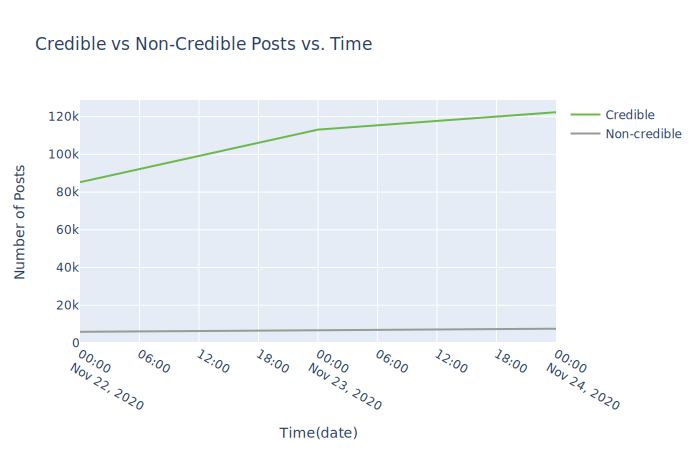

In [33]:
fig = go.Figure(data=go.Scatter(x=cred_df.day, y=cred_df[True],mode='lines', line_color='#6db84d', name='Credible'))
fig.add_trace(go.Scatter(x=cred_df.day, y=cred_df[False],mode='lines', line=dict(color="#979c95"), name='Non-credible'))
fig.update_xaxes(nticks=12)
fig.update_layout(
    title="Credible vs Non-Credible Posts vs. Time",
    xaxis_title="Time(date)",
    yaxis_title="Number of Posts")

fig.show(svg_option)

In [32]:
fig.write_image("images/credible_noncredible_over_time.png")

## Popularity Analysis

In [34]:
domains = pd.pivot_table(news_ratings_data, values = 'id',index = ['domain', 'rating', 'credible'], aggfunc ='count').sort_values(['rating', 'id'], ascending=False).reset_index()

In [36]:
## credible news sources sorted by rating and number of posts
credible_domains = domains[domains.credible == True]

In [37]:
print("Number of Credible Domains: ", len(credible_domains))
print("Top 20 Credible Domains: ")
print(credible_domains[['domain', 'rating']][0:20])

Number of Credible Domains:  999
Top 20 Credible Domains: 
                 domain  rating
0             patch.com   100.0
1       theguardian.com   100.0
2           nytimes.com   100.0
3               cnn.com   100.0
4           nbcnews.com   100.0
5    washingtonpost.com   100.0
6   businessinsider.com   100.0
7               npr.org   100.0
8                cbc.ca   100.0
9           cbsnews.com   100.0
10         usatoday.com   100.0
11          reuters.com   100.0
12         politico.com   100.0
13              wsj.com   100.0
14          latimes.com   100.0
15         newsweek.com   100.0
16              pbs.org   100.0
17             vice.com   100.0
18           ctvnews.ca   100.0
19               cnn.it   100.0


In [38]:
## non-credible news sources sorted by rating and number of posts
# noncredible_domains = domains[domains.credible == False].sort_values('rating', ascending=True)
noncredible_domains = domains[(domains['credible'] == False) & (domains['rating'] != -1.0)].sort_values('rating', ascending=True)

In [39]:
print("Number of Non-Credible Domains: ", len(noncredible_domains))
print("Top 20 Non-Credible Domains: ")
print(noncredible_domains[['domain', 'rating']][0:20])

Number of Non-Credible Domains:  34
Top 20 Non-Credible Domains: 
                            domain  rating
1032                 zerohedge.com     0.0
1031      worldnewsdailyreport.com     7.5
1030               sputniknews.com     7.5
1029               naturalnews.com    12.5
1028              yournewswire.com    15.0
1027  theconservativetreehouse.com    17.5
1026                  lifenews.com    17.5
1025              lifesitenews.com    17.5
1024          thegatewaypundit.com    20.0
1022                       wnd.com    25.0
1023                  infowars.com    25.0
1021           americanthinker.com    27.5
1020                gregpalast.com    32.0
1019                  arabnews.com    32.0
1018                        rt.com    32.5
1017            westernjournal.com    32.5
1016         middleeastmonitor.com    40.0
1015                  theblaze.com    40.0
1013                   pjmedia.com    42.0
1012                  redstate.com    42.0


#### Popularity of credible sources over time

In [40]:
credible_top20_domains = credible_domains[['domain']][0:5]
credible_top20_list = credible_top20_domains['domain'].to_list()
print(credible_top20_list)

['patch.com', 'theguardian.com', 'nytimes.com', 'cnn.com', 'nbcnews.com']


In [82]:
credible_domains['percentage'] = credible_domains.id.apply(lambda x: x*100.0/credibility_summary.id[0])

<ipython-input-82-c61ebe1d56ef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### credible domain % among all credible domains

In [83]:
credible_domains

,domain,rating,credible,id,percentage
0,patch.com,100.0,True,37113,11.570225
1,theguardian.com,100.0,True,8353,2.604103
2,nytimes.com,100.0,True,7845,2.445731
3,cnn.com,100.0,True,7385,2.302323
4,nbcnews.com,100.0,True,5412,1.687227
...,...,...,...,...,...
994,lifezette.com,62.5,True,388,0.120962
995,hotair.com,62.5,True,95,0.029617
996,wgnradio.com,62.5,True,34,0.010600
997,scmp.com,62.0,True,815,0.254082


In [41]:
credible_top20_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(credible_top20_list)], values = 'id',index = 'day', columns = 'domain', aggfunc ='count').sort_values(['day'], ascending=True).reset_index()

In [42]:
credible_top20_trend_df.head()

domain,day,cnn.com,nbcnews.com,nytimes.com,patch.com,theguardian.com
0,2020-11-22,2055,1289,2052,10551,2561
1,2020-11-23,2441,1962,2962,14052,2770
2,2020-11-24,2889,2161,2831,12510,3022


#### The time axis is in hour, which can be changed to date when we have more data

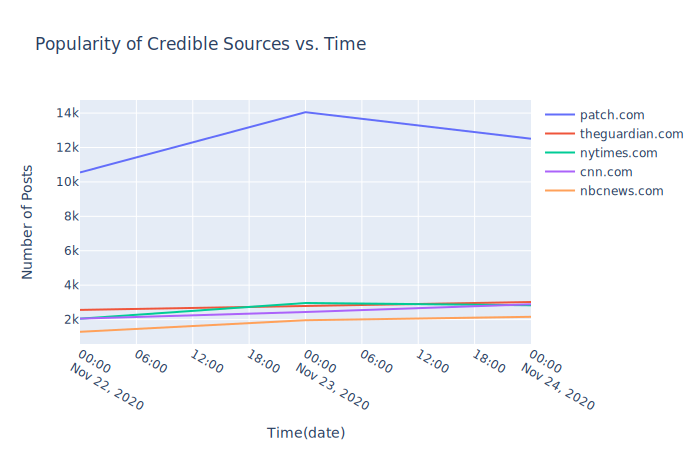

In [43]:
fig = go.Figure(data=go.Scatter(x=credible_top20_trend_df.day, y=credible_top20_trend_df[credible_top20_list[0]],mode='lines', name=credible_top20_list[0]))
for col in credible_top20_list[1:]:
                fig.add_trace(go.Scatter(x=credible_top20_trend_df.day, y=credible_top20_trend_df[col],mode='lines', name=col))
fig.update_xaxes(nticks=12)
fig.update_layout(
title="Popularity of Credible Sources vs. Time",
xaxis_title="Time(date)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [44]:
fig.write_image("images/top_credible_over_time.png")

#### Popularity of non-credible sources over time

In [45]:
noncredible_top20_domains = noncredible_domains[['domain']][0:5]
noncredible_top20_list = noncredible_top20_domains['domain'].to_list()
print(noncredible_top20_list)

['zerohedge.com', 'worldnewsdailyreport.com', 'sputniknews.com', 'naturalnews.com', 'yournewswire.com']


In [84]:
noncredible_domains['percentage'] = noncredible_domains.id.apply(lambda x: x*100.0/credibility_summary.id[1])

#### non-credible domain % among all non-credible domains

In [87]:
noncredible_domains.sort_values(['percentage'], ascending=False)

,domain,rating,credible,id,percentage
1000,breitbart.com,57.0,False,3821,18.945855
1017,westernjournal.com,32.5,False,2993,14.840341
1024,thegatewaypundit.com,20.0,False,2793,13.848671
1015,theblaze.com,40.0,False,1341,6.649147
1018,rt.com,32.5,False,1049,5.201309
1032,zerohedge.com,0.0,False,809,4.011305
1006,aljazeera.com,52.0,False,807,4.001388
1012,redstate.com,42.0,False,648,3.213011
1004,dailykos.com,54.5,False,602,2.984927
1013,pjmedia.com,42.0,False,599,2.970052


In [46]:
noncredible_top20_trend_df =  pd.pivot_table(news_ratings_data[news_ratings_data['domain'].isin(noncredible_top20_list)], values = 'id',index = 'day', columns = 'domain', aggfunc ='count').sort_values(['day'], ascending=True).reset_index()

In [47]:
noncredible_top20_trend_df.head()

domain,day,naturalnews.com,sputniknews.com,worldnewsdailyreport.com,yournewswire.com,zerohedge.com
0,2020-11-22,NaN,68.0,1.0,2.0,213.0
1,2020-11-23,2.0,94.0,3.0,87.0,286.0
2,2020-11-24,NaN,67.0,4.0,7.0,310.0


#### The time axis is in hour, which can be changed to date when we have more data

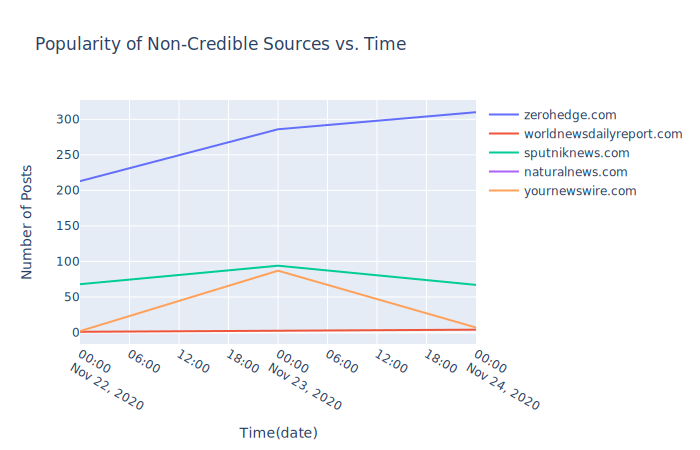

In [48]:
fig = go.Figure(data=go.Scatter(x=noncredible_top20_trend_df.day, y=noncredible_top20_trend_df[noncredible_top20_list[0]],mode='lines', name=noncredible_top20_list[0]))
for col in noncredible_top20_list[1:]:
                fig.add_trace(go.Scatter(x=noncredible_top20_trend_df.day, y=noncredible_top20_trend_df[col],mode='lines', name=col))
fig.update_xaxes(nticks=12)
fig.update_layout(
title="Popularity of Non-Credible Sources vs. Time",
xaxis_title="Time(date)",
yaxis_title="Number of Posts")
fig.show(svg_option)

In [49]:
fig.write_image("images/top_noncredible_over_time.png")

## Engagement Analysis

In [45]:
## Plot the CDF of the likes, shares, and all other engagement metrics for both credible and non-credible articles


In [92]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_like_df = news_ratings_data.groupby('statistics_likeCount')['statistics_likeCount'].agg('count').pipe(pd.DataFrame).rename(columns = {'statistics_likeCount': 'frequency'})

# PDF
stats_like_df['pdf'] = stats_like_df['frequency'] / sum(stats_like_df['frequency'])

# CDF
stats_like_df['cdf'] = stats_like_df['pdf'].cumsum()
stats_like_df = stats_like_df.reset_index()
stats_like_df

,statistics_likeCount,frequency,pdf,cdf
0,0,136160,0.399377,0.399377
1,1,34431,0.100991,0.500368
2,2,21144,0.062018,0.562387
3,3,14895,0.043689,0.606076
4,4,10911,0.032004,0.638079
...,...,...,...,...
2855,80686,2,0.000006,0.999971
2856,83953,3,0.000009,0.999979
2857,120845,2,0.000006,0.999985
2858,157735,2,0.000006,0.999991


In [96]:
stats_like_df.plot(x = 'statistics_likeCount', y = 'cdf')

In [50]:
## news sources that attract the most engagement
news_ratings_data.columns

Index(['id', 'date', 'updated', 'title', 'caption', 'expandedLinks', 'link',
       'postUrl', 'subscriberCount', 'score', 'account_id', 'account_name',
       'account_handle', 'account_subscriberCount', 'account_url',
       'account_accountType', 'account_pageAdminTopCountry',
       'account_verified', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount', 'domain', 'rating', 'credible', 'hour', 'day'],
      dtype='object')

In [71]:
statistics = pd.pivot_table(news_ratings_data, values = 'id',index = ['domain', 'rating', 'credible', 'statistics_likeCount', 'statistics_shareCount',
       'statistics_commentCount', 'statistics_loveCount',
       'statistics_wowCount', 'statistics_hahaCount', 'statistics_sadCount',
       'statistics_angryCount', 'statistics_thankfulCount',
       'statistics_careCount'], aggfunc ='count').sort_values(['domain', 'rating', 'credible', 'id']).reset_index()

In [72]:
statistics

,domain,rating,credible,statistics_likeCount,statistics_shareCount,statistics_commentCount,statistics_loveCount,statistics_wowCount,statistics_hahaCount,statistics_sadCount,statistics_angryCount,statistics_thankfulCount,statistics_careCount,id
0,10news.com,100.0,True,0,0,0,0,0,0,0,1,0,0,1
1,10news.com,100.0,True,0,0,0,0,0,0,1,0,0,1,1
2,10news.com,100.0,True,0,0,0,0,1,0,0,0,0,0,1
3,10news.com,100.0,True,0,0,1,0,2,0,0,0,0,0,1
4,10news.com,100.0,True,0,0,3,0,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157257,zerohedge.com,0.0,False,3,0,0,0,0,0,0,0,0,0,10
157258,zerohedge.com,0.0,False,1,1,0,0,0,0,0,0,0,0,11
157259,zerohedge.com,0.0,False,2,0,0,0,0,0,0,0,0,0,27
157260,zerohedge.com,0.0,False,1,0,0,0,0,0,0,0,0,0,39


In [65]:
import matplotlib.pyplot as plt
def plot_cdf(list_counts, xlabel, path, leg=False, islogx=True, xlimit=False):
    t_col = "#235dba"
    g_col = "#005916"
    c_col = "#a50808"
    r_col = "#ff9900"
    black = "#000000"
    pink = "#f442f1"
    t_ls = '-'
    r_ls = '--'
    c_ls = ':'
    g_ls = '-.'

    markers = [".", "o", "v", "^", "<", ">", "1", "2"]
    colors = [t_col, c_col, g_col, r_col, black, 'c', 'm', pink]
    line_styles = [t_ls, r_ls, c_ls, g_ls,t_ls, r_ls, c_ls, g_ls, t_ls]
    colors = colors[1:]
    line_styles= line_styles[1:]
    while(len(list_counts) > len(colors)):
        colors = colors + shuffle(colors)
        line_styles = line_styles + shuffle(line_styles)
        
    if xlimit:
        l2 = []
        for l in list_counts:
            l2_1 = [x for x in l if x<=xlimit]
            l2.append(l2_1)
        list_counts = l2
    
    for l in list_counts:
        l.sort()
    fig, ax = plt.subplots(figsize=(6,4))
    yvals = []
    for l in list_counts:
        yvals.append(np.arange(len(l))/float(len(l)-1))
    for i in range(len(list_counts)):
        ax.plot(list_counts[i], yvals[i], color=colors[i], linestyle=line_styles[i])
    if islogx:
        ax.set_xscale("log")
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.grid()
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    if leg:
        plt.legend(leg, loc='best', fontsize=13)
    
    plt.show()
    fig.savefig(path, bbox_inches='tight')

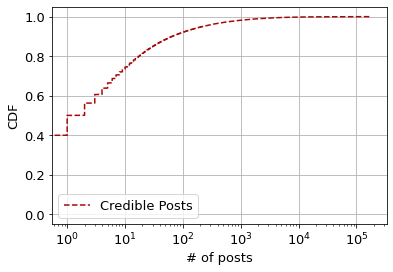

In [69]:
list_of_posts = [news_ratings_data[['id', 'statistics_likeCount']]['statistics_likeCount'].tolist()]


plot_cdf(list_of_posts, 
        '# of posts',
        leg=['Credible Posts'],
        path='./images/cdf_posts_like_count.pdf',
        islogx=True)